In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [65]:
url = "https://github.com/claudiodanielpc/vivienda_cdmx/raw/main/Indice%20SHF%20datos%20abiertos%201_trim_2024.xlsx"
ipvivi = pd.read_excel(url)
ipvivi.columns = ipvivi.columns.str.lower().str.replace(' ', '_')
ipvivi.rename(columns={'ano': 'año'}, inplace=True)
ipvivi = ipvivi[ipvivi['estado'].notna() & ipvivi['municipio'].isna()]
ipvivi = ipvivi[(ipvivi['año'] == 2013) | (ipvivi['año'] == 2023)]
ipvivi = ipvivi[['estado', 'trimestre', 'año', 'indice']]
ipvivi.sort_values(by=['estado', 'año', 'trimestre'], inplace=True)
ipvivi = ipvivi.groupby(['estado', 'año']).agg({'indice': lambda x: np.mean(x, axis=0)})
ipvivi.reset_index(inplace=True)
#Calcular tasa de crecimiento promedio anual
ipvivi["tcma"]=ipvivi.groupby("estado")["indice"].pct_change().add(1).pow(1/10).sub(1)*100
ipvivi=ipvivi[ipvivi["año"]==2023]
ipvivi=ipvivi.sort_values(by="tcma",ascending=False)
ipvivi

,estado,año,indice,tcma
5,Baja California Sur,2023,193.3575,9.152137
13,Ciudad de México,2023,153.9225,8.950422
45,Quintana Roo,2023,190.9050,8.939405
35,Nayarit,2023,184.2550,8.722952
49,Sinaloa,2023,182.5550,8.510610
3,Baja California,2023,179.6875,8.440201
7,Campeche,2023,172.4475,8.396839
27,Jalisco,2023,176.7875,8.202454
37,Nuevo León,2023,168.5450,8.049782
23,Guerrero,2023,165.9375,8.003326


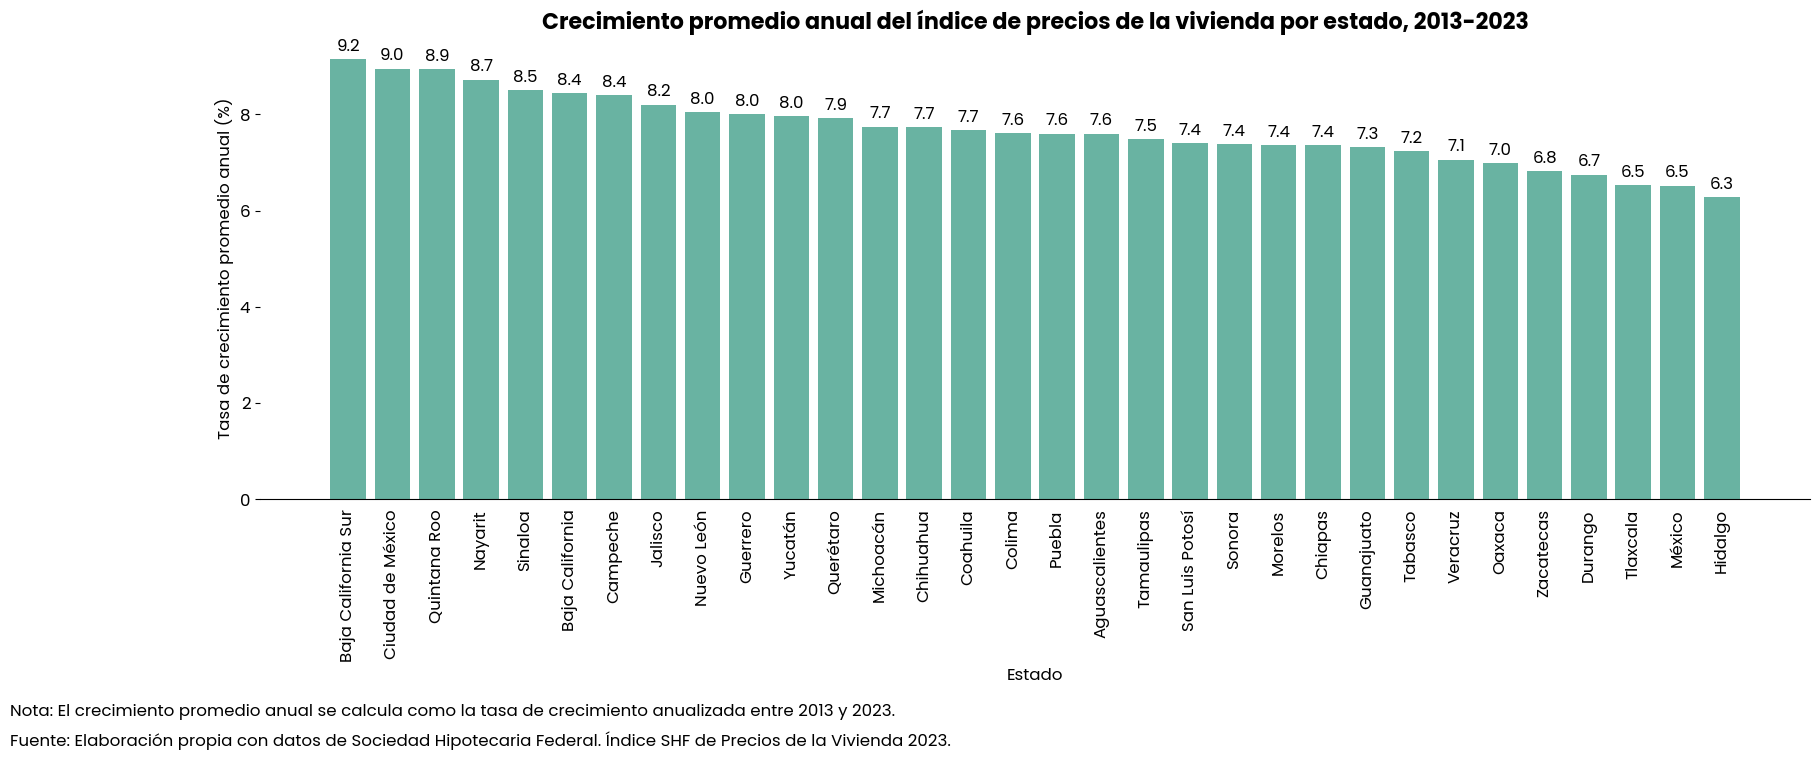

In [75]:
plt.rcParams.update({'font.family': 'Poppins'})

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(ipvivi["estado"], ipvivi["tcma"], color='#69b3a2')
ax.set_title('Crecimiento promedio anual del índice de precios de la vivienda por estado, 2013-2023', fontsize=16, fontweight='bold')
ax.set_xlabel('Estado')
ax.set_ylabel('Tasa de crecimiento promedio anual (%)')
plt.xticks(rotation=90)
#Eliminar ticks de los ejes
ax.tick_params(axis='x', which='both', bottom=False, top=False)


#Etiquetas de datos
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(round(i.get_height(), 1)), ha='center', va='bottom', fontsize=12)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.figtext(0, -0.25, 'Nota: El crecimiento promedio anual se calcula como la tasa de crecimiento anualizada entre 2013 y 2023.', horizontalalignment='left')
plt.figtext(0, -0.3, 'Fuente: Elaboración propia con datos de Sociedad Hipotecaria Federal. Índice SHF de Precios de la Vivienda 2023.', horizontalalignment='left')

#Guardar la imagen
plt.savefig('crecimiento_promedio_anual_ipvivi.png', bbox_inches='tight', dpi=100)